## Mouse: M044

Session: M044_2024_12_04_09_30

In [2]:
# imports
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("../../")

import pandas as pd
import numpy as np
import random
from statistics import mode
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import mat73
from IPython.display import display, Markdown

import pyaldata as pyal
import pylab
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from tools.curbd import curbd
import pylab
import importlib

from tools.dsp.preprocessing import preprocess
from tools.rnn_and_curbd.RNN_functions import *

np.random.seed(44)

#### For running on server

In [3]:
data_dir = "/data/bnd-data/raw/M044/M044_2024_12_04_09_30"
mat_file = "M044_2024_12_04_09_30_pyaldata.mat"

#### For running locally

In [4]:
data_dir = "/Users/zosiasus/Documents/M044/"
mat_file = "M044_2024_12_04_09_30_pyaldata.mat"

In [5]:
fname = os.path.join(data_dir, mat_file)

df = pyal.mat2dataframe(fname, shift_idx_fields=True)
mouse = mat_file.split('_')[0]

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field all_KSLabel could not be converted to int.


#### Preprocessing

In [6]:
df_ = preprocess(df, only_trials = False)
df_ = pyal.select_trials(df_, "idx_trial_end > 30365")  # Remove first 5 minutes because the switch was off

/Users/zosiasus/PyalData/pyaldata/PyalData/pyaldata/firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


Combined every 3 bins
Resulting all_spikes ephys data shape is (NxT): (474, 20000)


#### Selecting only small fraction to minimize running time

In [13]:
df_ = df_[:500]

#### Selecting brain regions

In [14]:
# Separate columns of 'all_spikes' to M1 and Dls (dorsolateral striatum)
brain_areas = ["Dls_rates", "M1_rates"]
df_["M1_rates"] = [df_["all_rates"][i][:,300:] for i in range(len(df_))]
df_["Dls_rates"] = [df_["all_rates"][i][:,0:300] for i in range(len(df_))]
for region in brain_areas:
    print(f"Neurons in {region.split('_')[0]}: {df_[region][0].shape[1]}")

Neurons in Dls: 300
Neurons in M1: 174


In [15]:
df_.head()

,animal,session,trial_id,trial_name,trial_length,bin_size,idx_trial_start,idx_trial_end,idx_CPI,values_before_camera_trigger,...,idx_session_timer,all_chan_best,all_unit_guide,all_KSLabel,all_spikes,all_rates,sol_level_id,sol_contra_ipsi,M1_rates,Dls_rates
0,M044,M044_2024_12_04_09_30,82,trial,133,0.03,30233,30366,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 2.798774, 0.0, 0.91412437, 0....",1.0,1.0,"[[0.003973114, 0.0, 0.0, 0.0, 0.0, 6.201384, 1...","[[0.0, 0.0, 0.0, 2.798774, 0.0, 0.91412437, 0...."
1,M044,M044_2024_12_04_09_30,83,intertrial,33,0.03,30366,30399,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.003973114, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0...",NaN,NaN,"[[0.0, 0.0, 0.00031967516, 0.0, 0.0, 0.0, 6.20...","[[0.003973114, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0..."
2,M044,M044_2024_12_04_09_30,84,trial,133,0.03,30399,30533,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.003973114, 0.0, 0.0, 0.0, 0.91444397,...",1.0,1.0,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 10.21812, 0.00...","[[0.0, 0.003973114, 0.0, 0.0, 0.0, 0.91444397,..."
3,M044,M044_2024_12_04_09_30,85,intertrial,100,0.03,30533,30633,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[1.4142135623730951, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[37.301525, 0.0, 0.0, 0.0, 0.00031967516, 6.2...",NaN,NaN,"[[2.798774, 0.0, 0.0, 12.949476, 0.0, 12.98424...","[[37.301525, 0.0, 0.0, 0.0, 0.00031967516, 6.2..."
4,M044,M044_2024_12_04_09_30,86,trial,133,0.03,30633,30766,[],[],...,[],"[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[[0, 1], [5, 1], [5, 3], [6, 2], [8, 2], [9, 1...","[good, mua, good, mua, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[25.524176, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000319...",0.0,1.0,"[[0.21239205, 0.0, 0.0, 0.0, 0.0, 0.0, 1.12651...","[[25.524176, 0.0, 0.0, 0.0, 0.0, 0.0, 0.000319..."


#### Update trial length column

In [16]:
df_['trial_length'] = df_['all_rates'].apply(lambda x: x.shape[0])

#### Variables

In [17]:
# perturbation time
perturbation_time = df_.idx_sol_on[0]
perturbation_time_seconds = perturbation_time * df_.bin_size[0]

# trial length
trial_len = mode(df_.trial_length) # this is kinda a crude way to do it but it works
print(f"length of trial: {trial_len}")

# number of rows
num_segments = len(df_)
print(f"Number of segments: {num_segments}")

# number of trials
num_trials = (df_.trial_length == trial_len).sum()
print(f"Number of trials: {num_trials}")

# number of inter-trials
num_inter = (df_.trial_length != trial_len).sum()
print(f"Number of trials: {num_inter}")


length of trial: 133
Number of segments: 500
Number of trials: 250
Number of trials: 250


#### Concatenate trials and inter-trials in time

In [18]:
concat_trials = pyal.concat_trials(df_, signal = "all_rates")

#### Plot RNN input

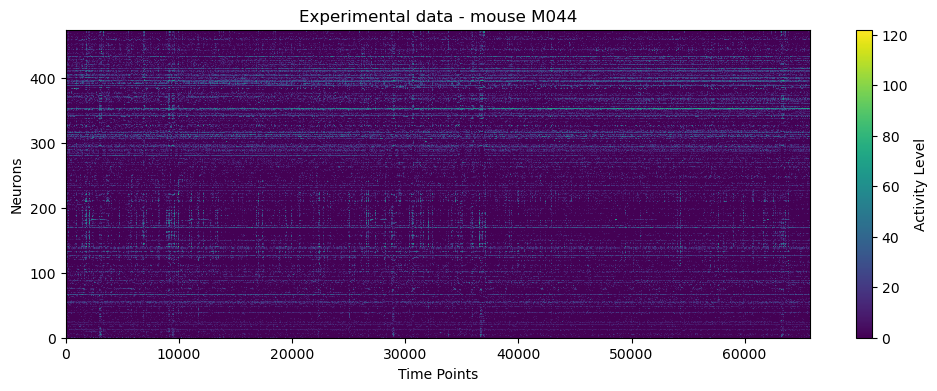

In [19]:
fig = plot_neuron_activity(concat_trials, "Experimental data", mouse)

### RNN training

In [20]:
activity = np.transpose(concat_trials)
regions = get_regions(df_, brain_areas)

In [21]:
rnn_model = curbd.trainMultiRegionRNN(activity,
                                  dtData=df.bin_size[0],
                                  dtFactor=2,
                                  tauRNN = 0.2,
                                  ampInWN= 0.001,
                                  g = 1.5,
                                  regions=regions,
                                  verbose=True,
                                  plotStatus=False,
                                  nRunFree=5,
                                  nRunTrain=200)

trial=0 pVar=0.431223 chi2=171.854261
trial=1 pVar=0.446092 chi2=168.055262
trial=2 pVar=0.439368 chi2=170.101377
trial=3 pVar=0.437977 chi2=170.523279
trial=4 pVar=0.440391 chi2=169.789429
trial=5 pVar=0.438205 chi2=170.452174
trial=6 pVar=0.440374 chi2=169.788569
trial=7 pVar=0.439409 chi2=170.076676
trial=8 pVar=0.443102 chi2=168.953836
trial=9 pVar=0.440374 chi2=169.780381
trial=10 pVar=0.442208 chi2=169.220384
trial=11 pVar=0.441966 chi2=169.290915
trial=12 pVar=0.441450 chi2=169.438461
trial=13 pVar=0.442607 chi2=169.088940
trial=14 pVar=0.441926 chi2=169.292452
trial=15 pVar=0.443514 chi2=168.807111
trial=16 pVar=0.444434 chi2=168.524894
trial=17 pVar=0.445875 chi2=168.091845
trial=18 pVar=0.446241 chi2=167.981622
trial=19 pVar=0.448097 chi2=167.412304
trial=20 pVar=0.443651 chi2=168.758358
trial=21 pVar=0.446696 chi2=167.827302
trial=22 pVar=0.443741 chi2=168.723641
trial=23 pVar=0.445905 chi2=168.059040
trial=24 pVar=0.444996 chi2=168.333888
trial=25 pVar=0.446516 chi2=167.867

#### Save RNN model and processed df

In [22]:
from scipy.io import savemat

# Save df_
df_dict = {col: df_[col].to_numpy() for col in df_.columns}
savemat(f"df_processed_{mouse}.mat", {"df_processed": df_dict})

# Save RNN model
rnn_model_to_save = rnn_model.copy()
try:
    if isinstance(rnn_model_to_save['params'].get('nonLinearity'), np.ufunc):
        rnn_model_to_save['params']['nonLinearity'] = rnn_model_to_save['params']['nonLinearity'].__name__
    savemat(f"rnn_model_{mouse}.mat", {"rnn_model": rnn_model_to_save})
except Exception as e:
    print(f"Error saving RNN model for mouse {mouse}:", e)

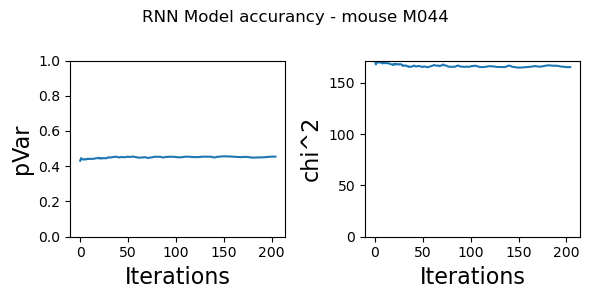

In [23]:
accuracy_fig = plot_model_accuracy(rnn_model, mouse)

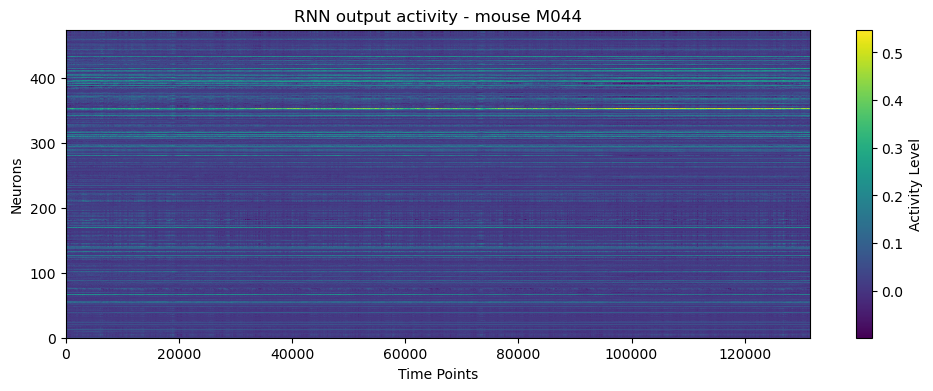

In [24]:
rnn_fig = plot_neuron_activity(rnn_model['RNN'].T, "RNN output activity", mouse)

In [28]:
fname = f"/Users/zosiasus/Documents/earthquake_shared/notebooks/M044/df_processed_{mouse}_continuous.mat"
df_saved = pyal.mat2dataframe(fname, shift_idx_fields=True)
df_saved.head()

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

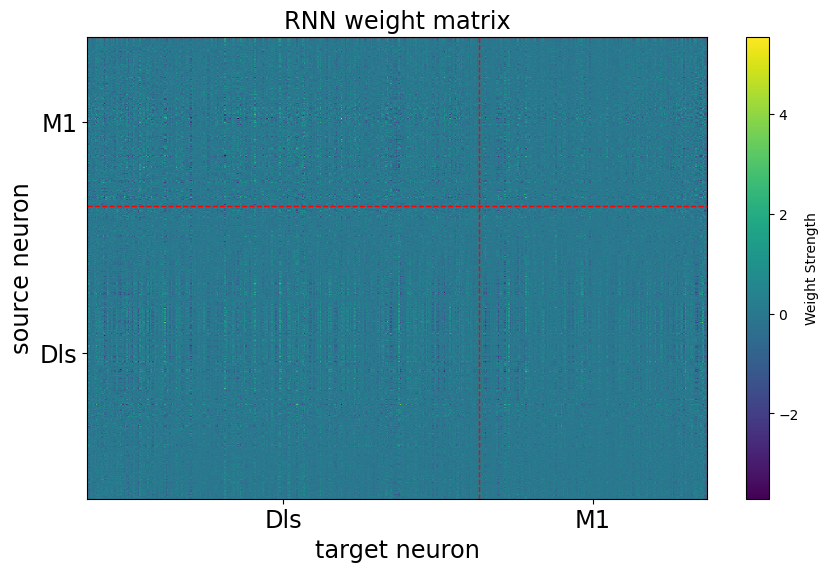

In [25]:
matrix_fig = plot_rnn_weight_matrix(rnn_model, regions)

#### Combining bins of the RNN model output

In [77]:
def combine_rnn_time_bins(rnn_model):                  
    rnn_output = rnn_model['RNN']      
    dtData = rnn_model['dtData']              
    tData = rnn_model['tData'] 
    tRNN = rnn_model['tRNN']

    # Set up array
    rnn_combine = np.zeros((rnn_output.shape[0], len(tData)))

    # For each time bin in tData, find corresponding RNN indices and average
    for i in range(len(tData)):
        t_start = tData[i]
        t_end = tData[i] + dtData
        idx = np.where((tRNN >= t_start) & (tRNN < t_end))[0]
    
        if len(idx) > 0:
            rnn_combine_bin = rnn_output[:, idx].mean(axis=1)
        else:
            rnn_combine_bin = np.zeros(rnn_output.shape[0])
    
        rnn_combine[:, i] = rnn_combine_bin
    print(f"RNN model output transformed from shape: {rnn_output.shape} to {rnn_combine.shape}. Matching the original data shape of {rnn_model['Adata'].shape}")
    return rnn_combine

In [78]:
rnn_model_ = rnn_model.copy()
rnn_model_['RNN'] = combine_rnn_time_bins(rnn_model_)

RNN model output transformed from shape: (474, 590265) to (474, 147567). Matching the original data shape of (474, 147567)


#### PCA of RNN model

In [136]:
reset_points = get_reset_points_continuous(df_, 1)
trial_len_rnn = trial_len

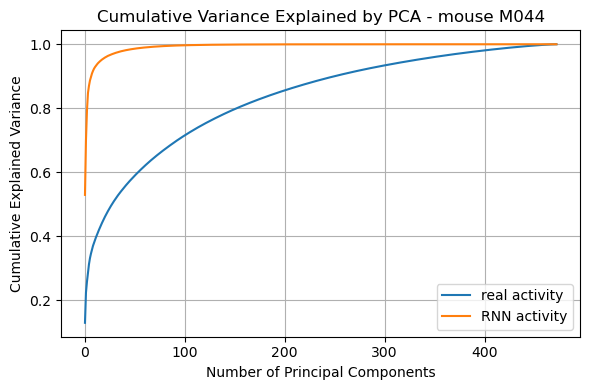

In [93]:
data_rnn = rnn_model_['RNN'].T
data_real = rnn_model_['Adata'].T
num_components = data_rnn.shape[1] - 1

# PCA
pca_real, pca_data_real = PCA_fit_transform(data_real, num_components)
pca_rnn, pca_data_rnn = PCA_fit_transform(data_rnn, num_components)

variance_figure = plot_PCA_cum_var(pca_real, pca_rnn, mouse)
# PCA_figure = plot_PCA(pca_data_real, pca_data_rnn, trial_num, mouse_num)

In [103]:
PCA_data_real, pcas_real = PCA_by_region(data_real, regions)
PCA_data_rnn, pcas_rnn = PCA_by_region(data_rnn, regions)

In [162]:
print(PCA_data_real[1].shape, PCA_data_rnn[1].shape)

(147567, 173) (147567, 173)


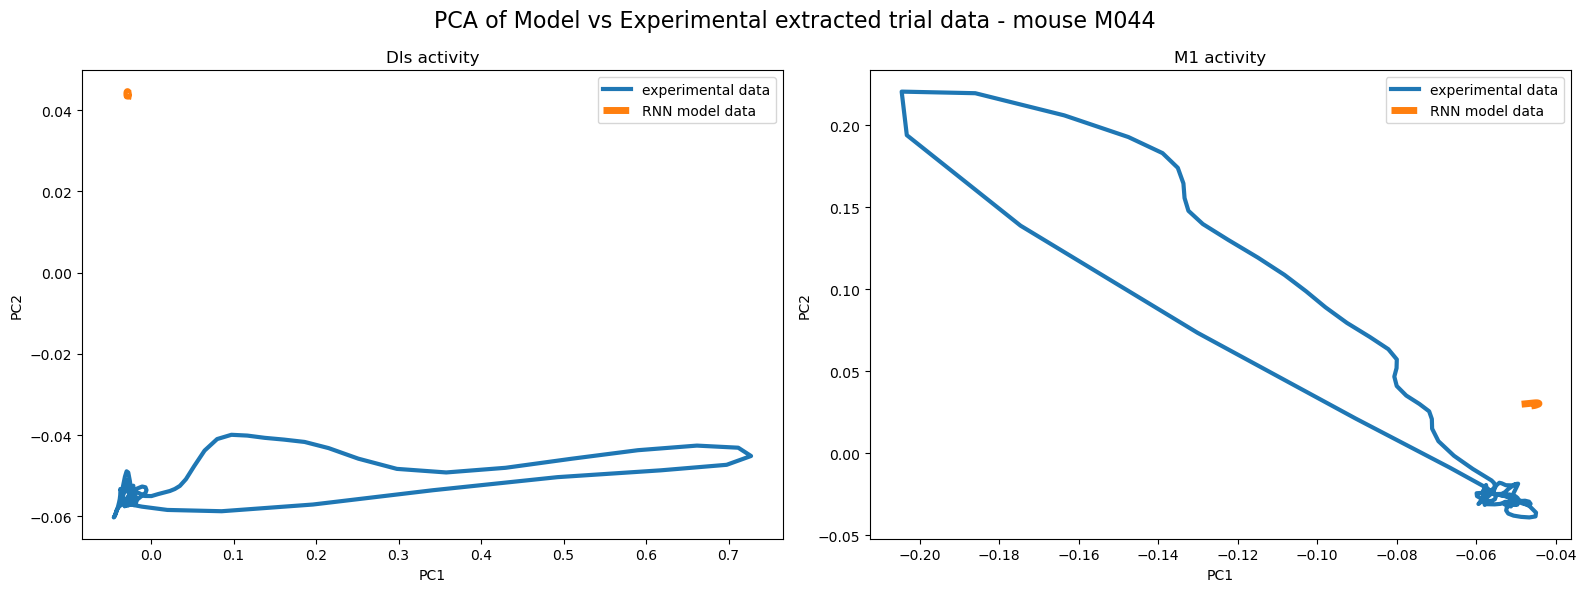

In [175]:
figure = plot_PCs_by_region(PCA_data_real, PCA_data_rnn, reset_points, regions, trial_len, mouse)

In [ ]:
# CCA
canonical_values, scores = CCA_compare(pca_data_real, pca_data_rnn, 200)
canonical_values = np.array(canonical_values)

CCA score of real data and RNN data aligment: -0.6765279755425173
CCA score for control on real data: 0.9999999999999994
CCA score for control on rnn data: 1.0


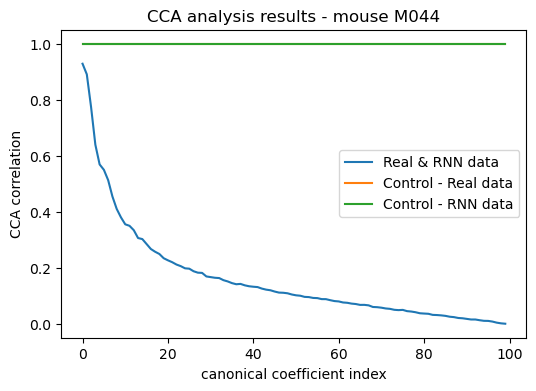

In [81]:
print(f"CCA score of real data and RNN data aligment: {scores[0]}")
print(f"CCA score for control on real data: {scores[1]}")
print(f"CCA score for control on rnn data: {scores[2]}")

CCA_figure = plot_CCA(canonical_values[:, 0], canonical_values[:, 1],
                          ['Real & RNN data', 'Control - Real data', 'Control - RNN data'], num_components, mouse)


### CURBD

In [82]:
curbd_arr, curbd_labels = curbd.computeCURBD(rnn_model_)
n_regions = curbd_arr.shape[0]

#### Plot currents 

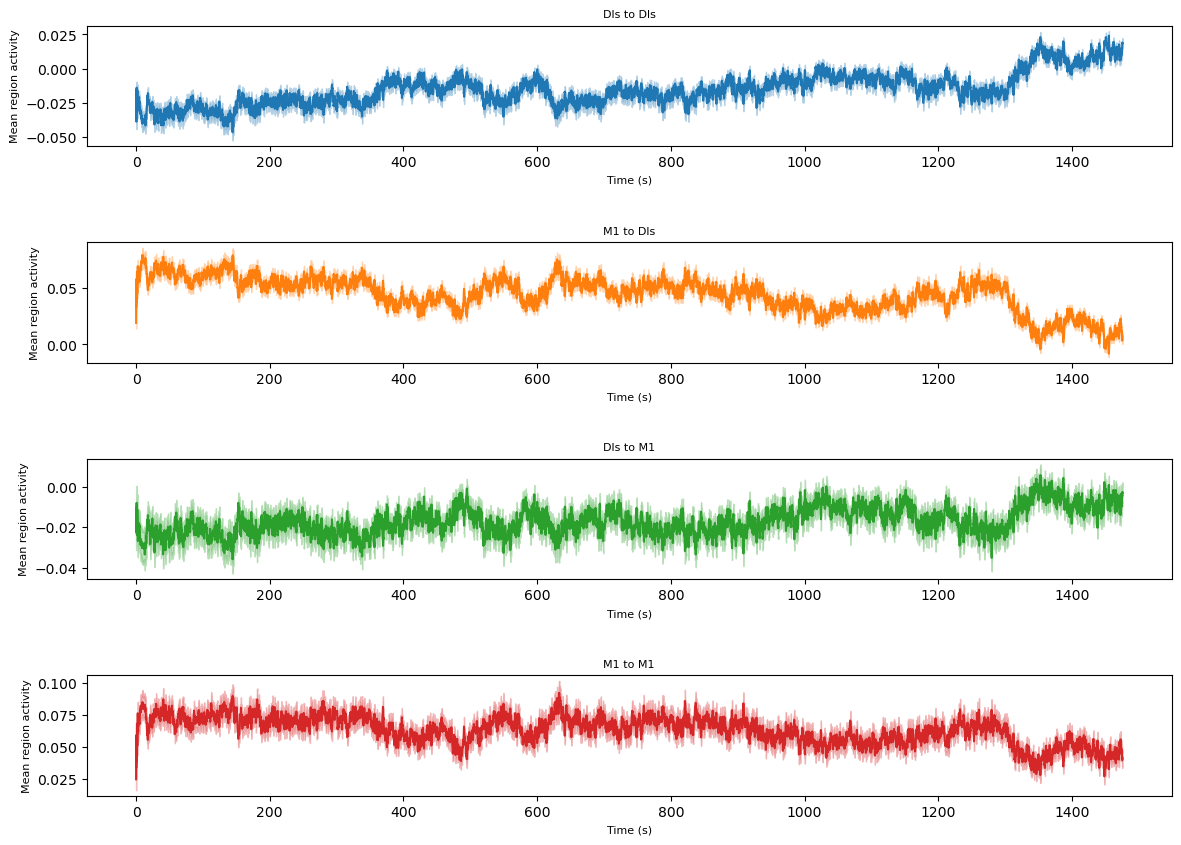

In [83]:
curbd_fig = pylab.figure(figsize=[14, 10])
count = 1
colors = ['C0', 'C1', 'C2', 'C3']

for iTarget in range(n_regions):
    for iSource in range(n_regions):
        axn = curbd_fig.add_subplot(n_regions*n_regions, 1, count)
        count += 1
        color = colors[(count - 2) % len(colors)]

        data = curbd_arr[iTarget, iSource]
        mean_activity = data.mean(axis=0)
        sem_activity = data.std(axis=0) / np.sqrt(data.shape[0])

        axn.plot(rnn_model_['tData'], mean_activity, color=color)

        axn.fill_between(rnn_model_['tData'],
                         mean_activity - sem_activity,
                         mean_activity + sem_activity,
                         color=color, alpha=0.3)

        axn.set_xlabel('Time (s)')
        axn.set_ylabel('Mean region activity')
        axn.set_title(curbd_labels[iTarget, iSource])
        axn.title.set_fontsize(8)
        axn.xaxis.label.set_fontsize(8)
        axn.yaxis.label.set_fontsize(8)

curbd_fig.subplots_adjust(hspace=0.8)
plt.show()

#### Get only current during trials

In [85]:
all_currents, all_current_labels = format_for_plotting(curbd_arr, curbd_labels, n_regions, reset_points)

In [104]:
trial_currents = []
inter_trial_currents = []

for region in all_currents:
    region_trial = []
    region_inter = []
    for neuron in region:
        neuron_trial = []
        neuron_inter = []
        for trial in neuron:
            if len(trial) == trial_len_rnn:
                neuron_trial.append(trial)
            else:
                neuron_inter.append(trial)
        region_trial.append(np.array(neuron_trial))
        region_inter.append(neuron_inter)
    trial_currents.append(np.array(region_trial))
    inter_trial_currents.append(region_inter)

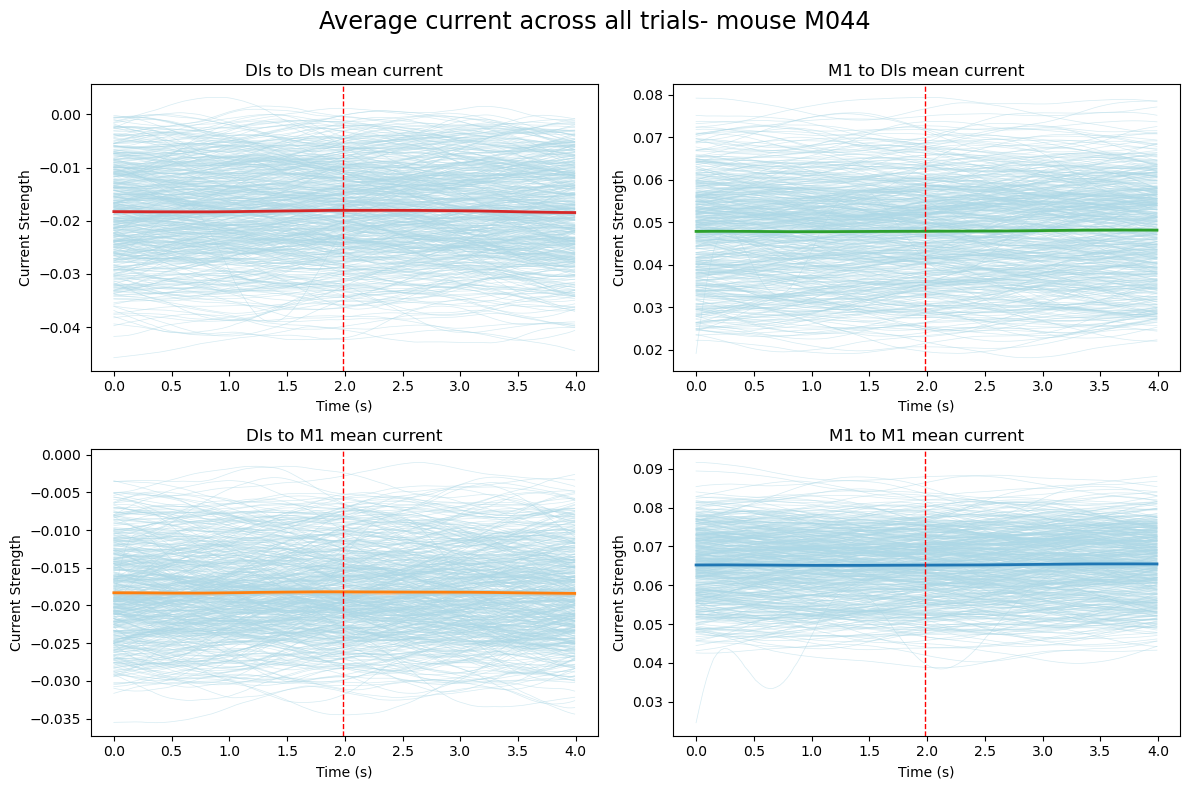

In [87]:
currents_fig = plot_all_currents_separate(trial_currents, all_current_labels, perturbation_time_seconds, df_.bin_size[0], dtFactor=1, mouse_num=mouse)
plt.show()

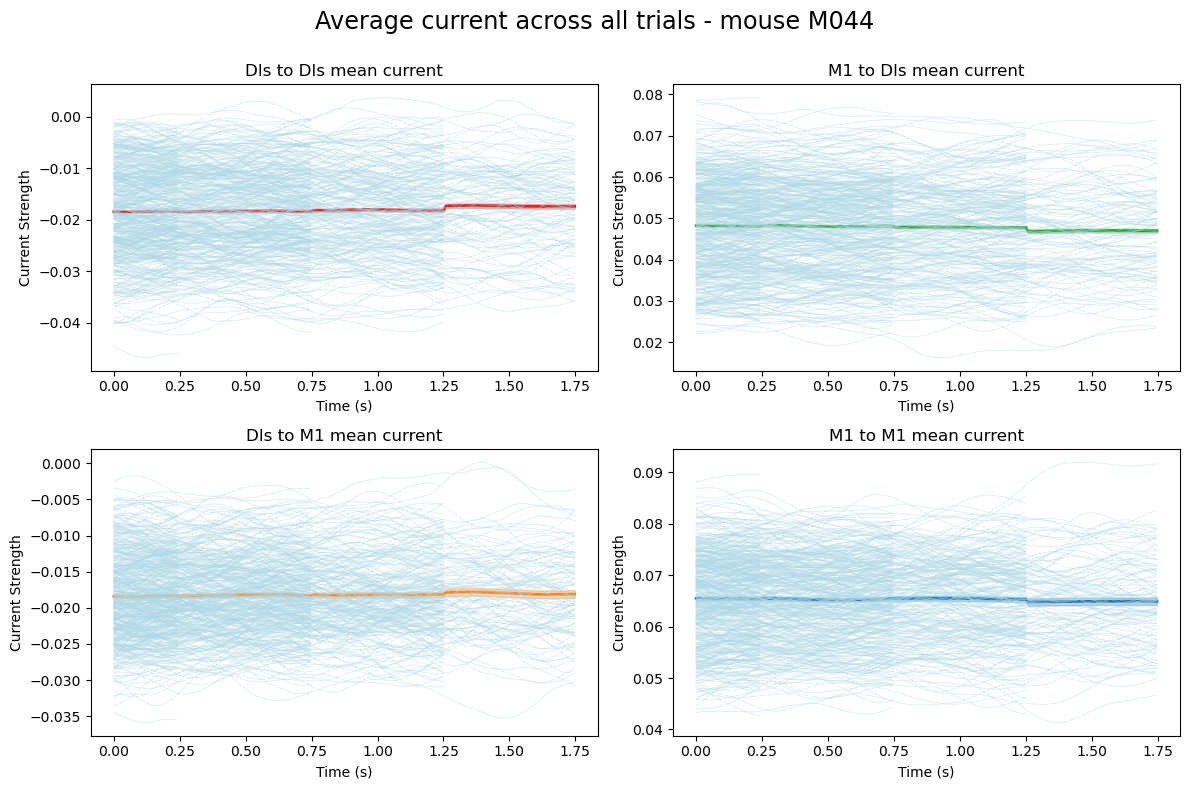

In [88]:
inter_currents_fig = plot_inter_trial_currents(inter_trial_currents, all_current_labels, df_.bin_size[0], dtFactor=4, mouse_num=mouse)
plt.show()

#### PCA of currents

/Users/zosiasus/Documents/earthquake_shared/tools/rnn_and_curbd/RNN_functions.py:686: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


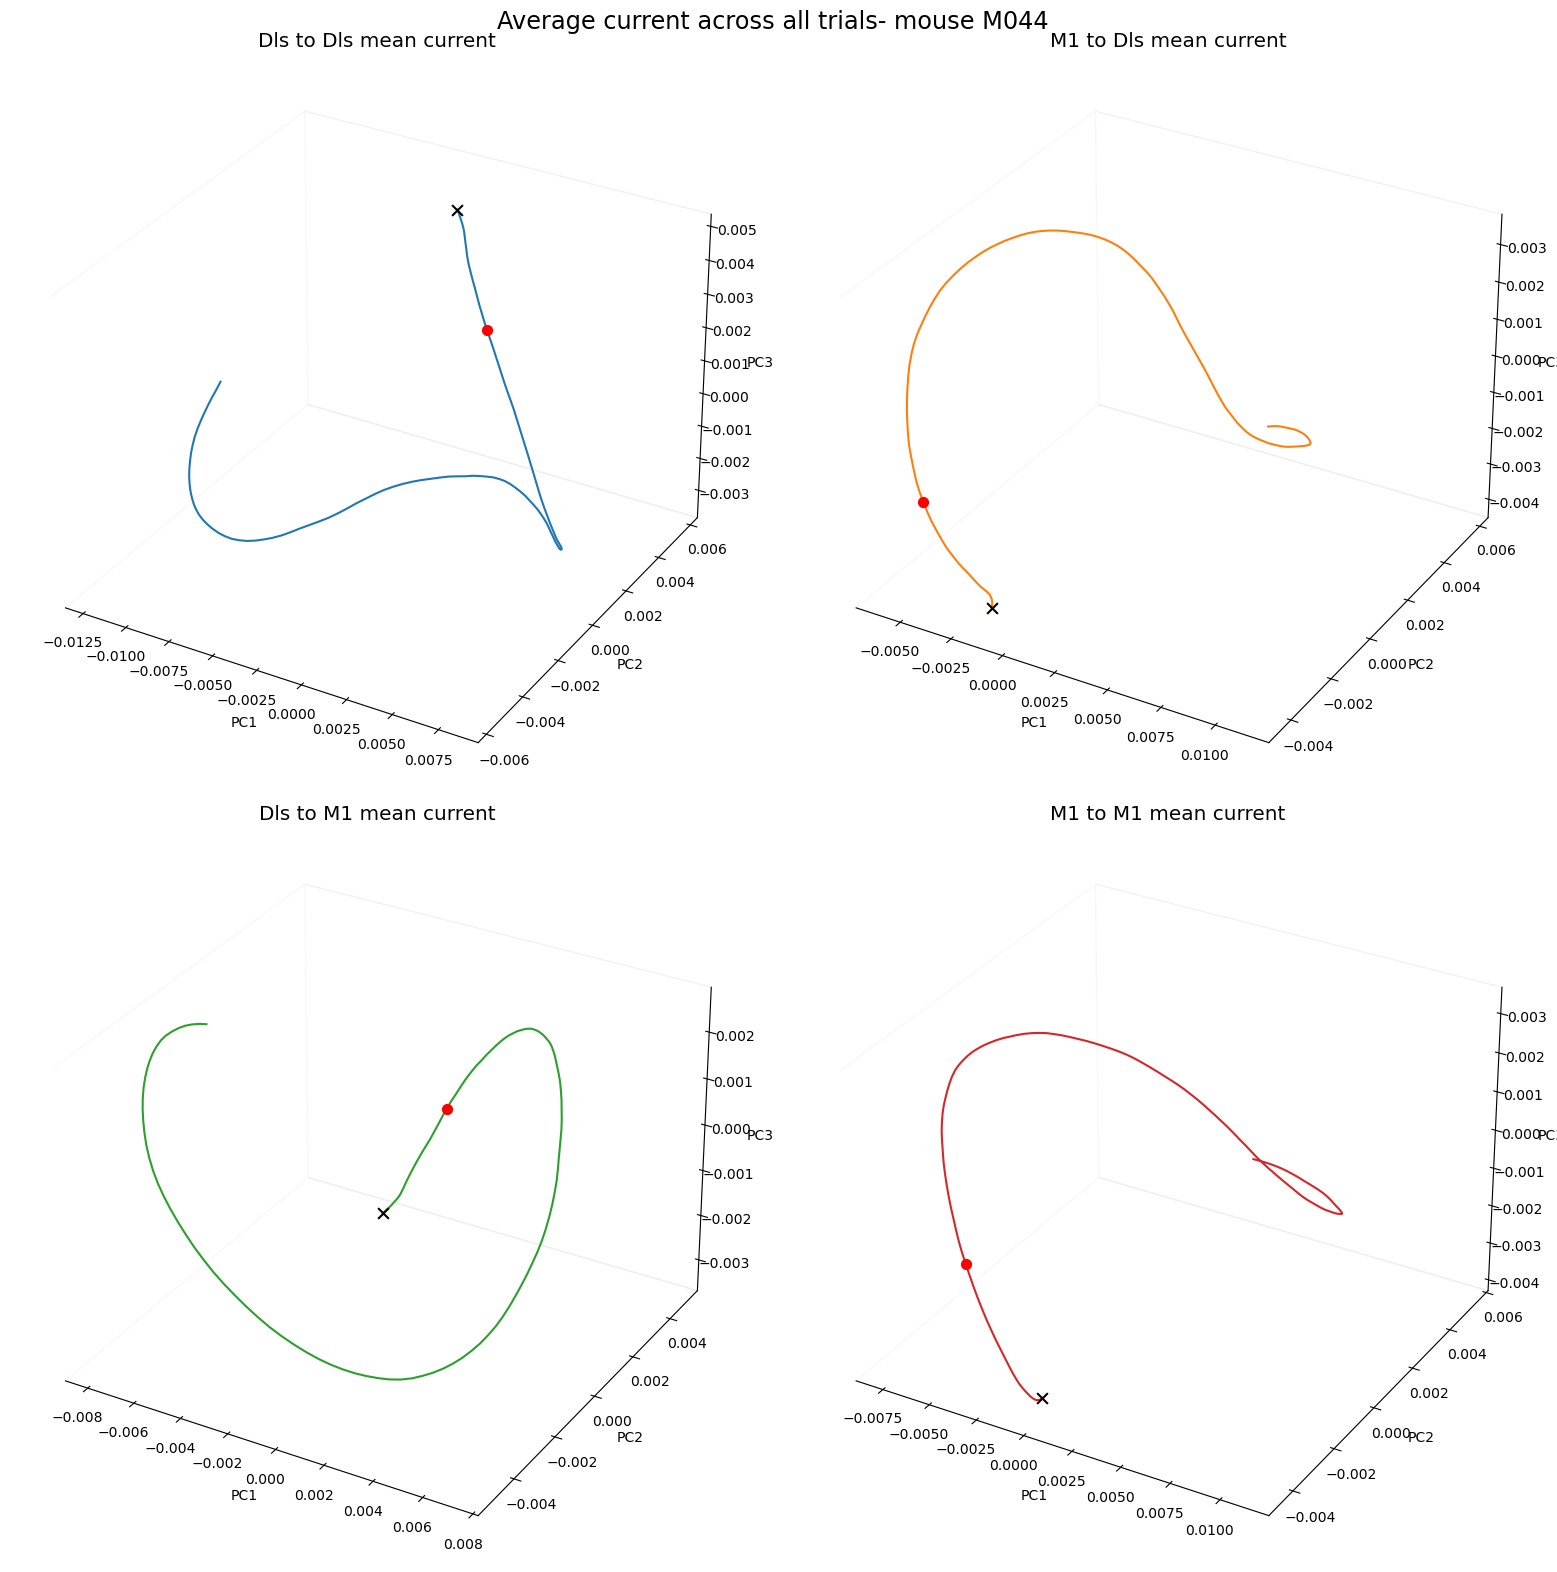

In [89]:
pca_current_fig = PCA_of_currents(trial_currents, all_current_labels, int((perturbation_time/3)),mouse)